In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("results/nlpsolver_rel.pickle", "rb") as f:
        nlpsolver_rel = pickle.load(f)
with open("results/binapprox_miqp.pickle", "rb") as f:
        binapprox_miqp = pickle.load(f)
with open("results/nlpsolver_bin_miqp.pickle", "rb") as f:
        nlpsolver_bin_miqp = pickle.load(f)
with open("results/nlpsolver_bin_cia.pickle", "rb") as f:
        nlpsolver_bin_cia = pickle.load(f)
        
time_grid = nlpsolver_rel.time_grid / 3600

### Ambient

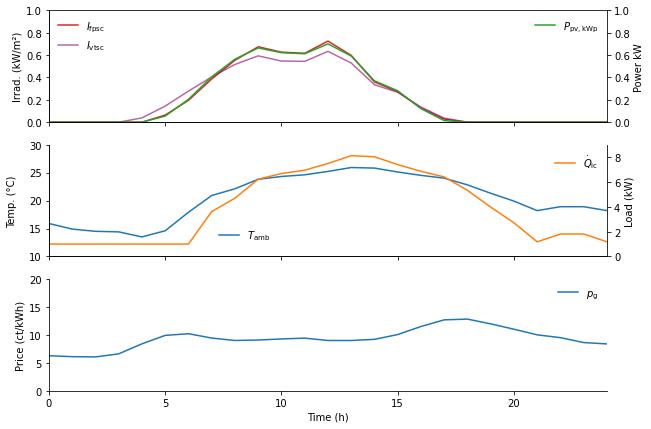

In [3]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(10,7))

ax[0].plot(time_grid, nlpsolver_rel.c_data[:,1]/1e3, color = "#d62728ff", label = "$I_\mathsf{fpsc}$")
ax[0].plot(time_grid, nlpsolver_rel.c_data[:,2]/1e3, color = "#8c0e6ca0", label = "$I_\mathsf{vtsc}$")
ax0a = ax[0].twinx()
ax0a.plot(time_grid, nlpsolver_rel.c_data[:,4]/1e3, color = "C2", label = "$P_\mathsf{pv,kWp}$")

ax[0].set_ylim(0,1)
ax[0].set_ylabel("Irrad. (kW/m²)")
ax[0].legend(loc="upper left", framealpha=0.0)

ax0a.set_ylim(0,1)
ax0a.set_ylabel("Power kW")
ax0a.legend(loc="upper right", framealpha=0.0)

ax[1].plot(time_grid, nlpsolver_rel.c_data[:,0], color = "C0", label = "$T_\mathsf{amb}$")
#ax[0].set_ylim(0,950)
ax[1].set_ylabel("Temp. (°C)", labelpad=12)
ax[1].set_ylim(10, 30)
ax[1].legend(loc="lower center", framealpha=0.0,  bbox_to_anchor=(0.35, 0.05))

ax1a = ax[1].twinx()
ax1a.plot(time_grid, nlpsolver_rel.c_data[:,3]/1e3, color = "C1", label = "$\dot{Q}_\mathsf{lc}$")
ax1a.set_ylabel("Load (kW)")
ax1a.set_ylim(0, 9)
ax1a.legend(loc="upper right", framealpha=0.0)

ax[2].plot(time_grid, nlpsolver_rel.c_data[:,5], color = "C0", label = "$p_\mathsf{g}$")
ax[2].set_ylim(0,20)
ax[2].set_ylabel("Price (ct/kWh)")
ax[2].legend(loc="upper right", framealpha=0.0)

ax[-1].set_xlim(time_grid[0], time_grid[-1])
ax[-1].set_xlabel("Time (h)")

for ax_k in ax:
    ax_k.spines["top"].set_visible(False)
    ax_k.spines["right"].set_visible(False)
    
ax1a.spines["top"].set_visible(False)

plt.show();

### States

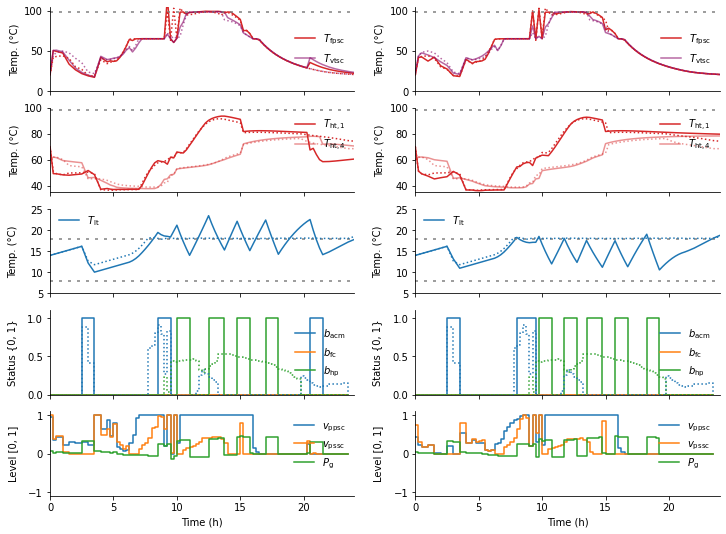

In [4]:
fig, ax = plt.subplots(5, 2, sharex=True, figsize=(12,9))

ax[0][1].plot(time_grid, nlpsolver_bin_miqp.x_data[:,6], color = "#d62728ff", label = "$T_\mathsf{fpsc}$")
ax[0][1].plot(time_grid, nlpsolver_bin_miqp.x_data[:,8], color = "#8c0e6ca0", label = "$T_\mathsf{vtsc}$")
ax[0][1].plot([time_grid[0], time_grid[-1]], [98.0, 98.0], color = "C7", linestyle="dashed", dashes=(2, 4))
ax[0][0].plot(time_grid, nlpsolver_bin_cia.x_data[:,6], color = "#d62728ff", label = "$T_\mathsf{fpsc}$")
ax[0][0].plot(time_grid, nlpsolver_bin_cia.x_data[:,8], color = "#8c0e6ca0", label = "$T_\mathsf{vtsc}$")
ax[0][0].plot([time_grid[0], time_grid[-1]], [98.0, 98.0], color = "C7", linestyle="dashed", dashes=(2, 4))

ax[0][1].plot(time_grid, nlpsolver_rel.x_data[:,6], color = "#d62728ff", linestyle="dotted")
ax[0][1].plot(time_grid, nlpsolver_rel.x_data[:,8], color = "#8c0e6ca0", linestyle="dotted")
ax[0][0].plot(time_grid, nlpsolver_rel.x_data[:,6], color = "#d62728ff", linestyle="dotted")
ax[0][0].plot(time_grid, nlpsolver_rel.x_data[:,8], color = "#8c0e6ca0", linestyle="dotted")

for ax_j in ax[0]:
    ax_j.set_ylim(0,105)
    ax_j.set_ylabel("Temp. (°C)")
    ax_j.legend(loc="center right", framealpha=0.0)

    
ax[1][1].plot(time_grid, nlpsolver_bin_miqp.x_data[:,0], color="#d62728ff", label = "$T_\mathsf{ht,1}$")
ax[1][1].plot(time_grid, nlpsolver_bin_miqp.x_data[:,3], color="#d6272880", label = "$T_\mathsf{ht,4}$")
ax[1][1].plot([time_grid[0], time_grid[-1]], [98.0, 98.0], color = "C7", linestyle="dashed", dashes=(2, 4))
ax[1][0].plot(time_grid, nlpsolver_bin_cia.x_data[:,0], color="#d62728ff", label = "$T_\mathsf{ht,1}$")
ax[1][0].plot(time_grid, nlpsolver_bin_cia.x_data[:,3], color="#d6272880", label = "$T_\mathsf{ht,4}$")
ax[1][0].plot([time_grid[0], time_grid[-1]], [98.0, 98.0], color = "C7", linestyle="dashed", dashes=(2, 4))

ax[1][1].plot(time_grid, nlpsolver_rel.x_data[:,0], color="#d62728ff", linestyle="dotted")
ax[1][1].plot(time_grid, nlpsolver_rel.x_data[:,3], color="#d6272880", linestyle="dotted")
ax[1][0].plot(time_grid, nlpsolver_rel.x_data[:,0], color="#d62728ff", linestyle="dotted")
ax[1][0].plot(time_grid, nlpsolver_rel.x_data[:,3], color="#d6272880", linestyle="dotted")

for ax_j in ax[1]:
    ax_j.set_ylim(35,100)
    ax_j.set_ylabel("Temp. (°C)")
    ax_j.legend(loc="upper right", framealpha=0.0)

    
ax[2][1].plot(time_grid, nlpsolver_bin_miqp.x_data[:,4], color = "#1f77b4ff", label = "$T_\mathsf{lt}$")
ax[2][1].plot([time_grid[0], time_grid[-1]], [18.0, 18.0], color = "C7", linestyle="dashed", dashes=(2, 4))
ax[2][1].plot([time_grid[0], time_grid[-1]], [8.0, 8.0], color = "C7", linestyle="dashed", dashes=(2, 4))
ax[2][0].plot(time_grid, nlpsolver_bin_cia.x_data[:,4], color = "#1f77b4ff", label = "$T_\mathsf{lt}$")
ax[2][0].plot([time_grid[0], time_grid[-1]], [18.0, 18.0], color = "C7", linestyle="dashed", dashes=(2, 4))
ax[2][0].plot([time_grid[0], time_grid[-1]], [8.0, 8.0], color = "C7", linestyle="dashed", dashes=(2, 4))

ax[2][1].plot(time_grid, nlpsolver_rel.x_data[:,4], color = "#1f77b4ff", linestyle="dotted")
ax[2][0].plot(time_grid, nlpsolver_rel.x_data[:,4], color = "#1f77b4ff", linestyle="dotted")

for ax_j in ax[2]:
    ax_j.set_ylim(5,25)
    ax_j.set_ylabel("Temp. (°C)", labelpad=12)
    ax_j.legend(loc="upper left", ncol=2, framealpha=0.0, bbox_to_anchor=(0, 1.05, 1.1, 0.0))


ax[3][1].step(time_grid[:-1], nlpsolver_bin_miqp.b_data[:,0], where="post", color = "#1f77b4ff", label = "$b_\mathsf{acm}$")
ax[3][1].step(time_grid[:-1], nlpsolver_bin_miqp.b_data[:,1], where="post", color = "#ff7f0eff", label = "$b_\mathsf{fc}$")
ax[3][1].step(time_grid[:-1], nlpsolver_bin_miqp.b_data[:,2], where="post", color = "C2", label = "$b_\mathsf{hp}$")
ax[3][0].step(time_grid[:-1], nlpsolver_bin_cia.b_data[:,0], where="post", color = "#1f77b4ff", label = "$b_\mathsf{acm}$")
ax[3][0].step(time_grid[:-1], nlpsolver_bin_cia.b_data[:,1], where="post", color = "#ff7f0eff", label = "$b_\mathsf{fc}$")
ax[3][0].step(time_grid[:-1], nlpsolver_bin_cia.b_data[:,2], where="post", color = "C2", label = "$b_\mathsf{hp}$")

ax[3][1].step(time_grid[:-1], nlpsolver_rel.b_data[:,0], color="#1f77b4ff", where="post", linestyle="dotted")
ax[3][1].step(time_grid[:-1], nlpsolver_rel.b_data[:,1], color="#ff7f0eff", where="post", linestyle="dotted")
ax[3][1].step(time_grid[:-1], nlpsolver_rel.b_data[:,2], color="C2", where="post", linestyle="dotted")
ax[3][0].step(time_grid[:-1], nlpsolver_rel.b_data[:,0], color="#1f77b4ff", where="post", linestyle="dotted")
ax[3][0].step(time_grid[:-1], nlpsolver_rel.b_data[:,1], color="#ff7f0eff", where="post", linestyle="dotted")
ax[3][0].step(time_grid[:-1], nlpsolver_rel.b_data[:,2], color="C2", where="post", linestyle="dotted")

for ax_j in ax[3]:
    ax_j.set_ylim(0, 1.1)
    ax_j.set_ylabel("Status {0, 1}", labelpad=10)
    #ax_j.legend(loc="center left", framealpha=0.0, bbox_to_anchor=(0.08, 0.5, 1.1, 0.3))
    ax_j.legend(loc="center right", framealpha=0.0)

    
ax[4][1].step(time_grid[:-1], nlpsolver_bin_miqp.u_data[:,0], where="post", color = "C0", label="$v_\mathsf{ppsc}$")
ax[4][1].step(time_grid[:-1], nlpsolver_bin_miqp.u_data[:,2], where="post", color = "C1", label="$v_\mathsf{pssc}$")
ax[4][1].step(time_grid[:-1], nlpsolver_bin_miqp.u_data[:,3], where="post", color = "C2", label="$P_\mathsf{g}$")
ax[4][0].step(time_grid[:-1], nlpsolver_bin_cia.u_data[:,0], where="post", color = "C0", label="$v_\mathsf{ppsc}$")
ax[4][0].step(time_grid[:-1], nlpsolver_bin_cia.u_data[:,2], where="post", color = "C1", label="$v_\mathsf{pssc}$")
ax[4][0].step(time_grid[:-1], nlpsolver_bin_cia.u_data[:,3], where="post", color = "C2", label="$P_\mathsf{g}$")

#ax[4][1].step(time_grid[:-1], nlpsolver_bin_miqp.u_data[:,0], where="post", color = "C0", linestyle="dotted")
#ax[4][1].step(time_grid[:-1], nlpsolver_bin_miqp.u_data[:,2], where="post", color = "C1", linestyle="dotted")
#ax[4][0].step(time_grid[:-1], nlpsolver_bin_cia.u_data[:,0], where="post", color = "C0", linestyle="dotted")
#ax[4][0].step(time_grid[:-1], nlpsolver_bin_cia.u_data[:,2], where="post", color = "C1", linestyle="dotted")



for ax_j in ax[4]:
    ax_j.set_ylim(-1.1, 1.1)
    ax_j.set_ylabel("Level [0, 1]", labelpad=10)
    ax_j.legend(loc="upper right", framealpha=0.0)

    
for ax_j in ax[-1]: 
    ax_j.set_xlim(time_grid[0], time_grid[-1])
    ax_j.set_xlabel("Time (h)")

for ax_k in ax:
    for ax_k_j in ax_k:
        ax_k_j.spines["top"].set_visible(False)
        ax_k_j.spines["right"].set_visible(False)
        
plt.show();

# Solution steps

In [39]:
method = "miqp"
# method = "cia"

with open("results/nlpsolver_rel.pickle", "rb") as f:
    nlpsolver_rel = pickle.load(f)

with open(f"results/binapprox_{method}.pickle", "rb") as f:
    binapprox = pickle.load(f)
        
with open(f"results/nlpsolver_bin_{method}.pickle", "rb") as f:
    nlpsolver_bin = pickle.load(f)
        
time_grid = nlpsolver_rel.time_grid / 3600

/home/ab/envs/voronoi-test/lib/python3.7/site-packages/ipykernel_launcher.py:125: RuntimeWarning: divide by zero encountered in true_divide
/home/ab/envs/voronoi-test/lib/python3.7/site-packages/ipykernel_launcher.py:125: RuntimeWarning: invalid value encountered in true_divide
/home/ab/envs/voronoi-test/lib/python3.7/site-packages/ipykernel_launcher.py:127: RuntimeWarning: divide by zero encountered in true_divide
/home/ab/envs/voronoi-test/lib/python3.7/site-packages/ipykernel_launcher.py:127: RuntimeWarning: invalid value encountered in true_divide
/home/ab/envs/voronoi-test/lib/python3.7/site-packages/ipykernel_launcher.py:137: RuntimeWarning: divide by zero encountered in true_divide


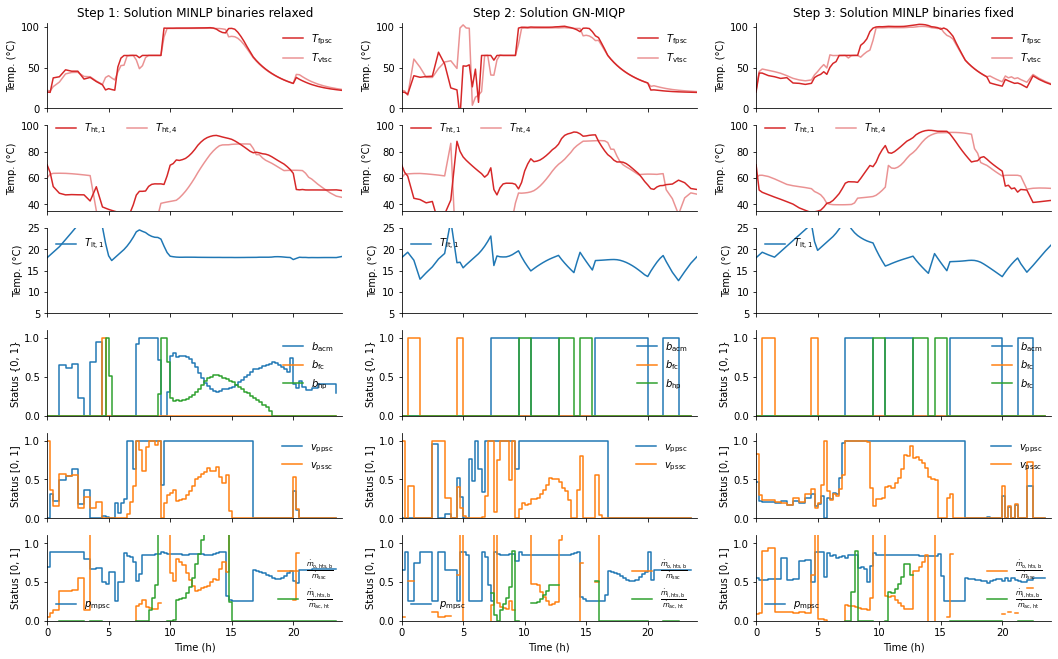

In [41]:
fig, ax = plt.subplots(6, 3, sharex=True, figsize=(18,11))

ax[0][0].plot(time_grid, nlpsolver_rel.x_data[:,6], color = "#d62728ff", label = "$T_\mathsf{fpsc}$")
ax[0][0].plot(time_grid, nlpsolver_rel.x_data[:,8], color = "#d6272880", label = "$T_\mathsf{vtsc}$")

if method == "miqp":
    ax[0][1].plot(time_grid, binapprox.x_data[:,6], color = "#d62728ff", label = "$T_\mathsf{fpsc}$")
    ax[0][1].plot(time_grid, binapprox.x_data[:,8], color = "#d6272880", label = "$T_\mathsf{vtsc}$")

ax[0][2].plot(time_grid, nlpsolver_bin.x_data[:,6], color = "#d62728ff", label = "$T_\mathsf{fpsc}$")
ax[0][2].plot(time_grid, nlpsolver_bin.x_data[:,8], color = "#d6272880", label = "$T_\mathsf{vtsc}$")

for ax_j in ax[0]:
    ax_j.set_ylim(0,105)
    ax_j.set_ylabel("Temp. (°C)")
    ax_j.legend(loc="upper right", framealpha=0.0)


ax[1][0].plot(time_grid, nlpsolver_rel.x_data[:,0], color="#d62728ff", label = "$T_\mathsf{ht,1}$")
ax[1][0].plot(time_grid, nlpsolver_rel.x_data[:,3], color="#d6272880", label = "$T_\mathsf{ht,4}$")
ax[1][0].set_ylim(35,100)
ax[1][0].set_ylabel("Temp. (°C)")
ax[1][0].legend(loc="upper left", ncol=4, framealpha=0.0, bbox_to_anchor=(0, 1.15, 1.1, 0.0))

if method == "miqp":
    ax[1][1].plot(time_grid, binapprox.x_data[:,0], color="#d62728ff", label = "$T_\mathsf{ht,1}$")
    ax[1][1].plot(time_grid, binapprox.x_data[:,3], color="#d6272880", label = "$T_\mathsf{ht,4}$")
    ax[1][1].set_ylim(35,100)
    ax[1][1].set_ylabel("Temp. (°C)")
    ax[1][1].legend(loc="upper left", ncol=4, framealpha=0.0, bbox_to_anchor=(0, 1.15, 1.1, 0.0))

else:
    
    ax[1][1].plot(time_grid[:-1], np.cumsum(nlpsolver_rel.b_data[:,0]*nlpsolver_rel._timing.time_steps), linestyle="dotted", color = "#1f77b4ff")    
    ax[1][1].plot(time_grid[:-1], np.cumsum(binapprox.b_data[:,0]*binapprox._timing.time_steps), color = "#1f77b4ff", label = "$\int b_\mathsf{acm}$")
    ax[1][1].set_yticklabels([])
    ax[1][1].legend(loc="lower right", ncol=4, framealpha=0.0)
    
ax[1][2].plot(time_grid, nlpsolver_bin.x_data[:,0], color="#d62728ff", label = "$T_\mathsf{ht,1}$")
ax[1][2].plot(time_grid, nlpsolver_bin.x_data[:,3], color="#d6272880", label = "$T_\mathsf{ht,4}$")
ax[1][2].set_ylim(35,100)
ax[1][2].set_ylabel("Temp. (°C)")
ax[1][2].legend(loc="upper left", ncol=4, framealpha=0.0, bbox_to_anchor=(0, 1.15, 1.1, 0.0))

    
ax[2][0].plot(time_grid, nlpsolver_rel.x_data[:,4], color = "#1f77b4ff", label = "$T_\mathsf{lt,1}$")
ax[2][0].set_ylim(5,25)
ax[2][0].set_ylabel("Temp. (°C)")
ax[2][0].legend(loc="upper left", ncol=2, framealpha=0.0)

if method == "miqp":
    
    ax[2][1].plot(time_grid, binapprox.x_data[:,4], color = "#1f77b4ff", label = "$T_\mathsf{lt,1}$")
    ax[2][1].set_ylim(5,25)
    ax[2][1].set_ylabel("Temp. (°C)")
    ax[2][1].legend(loc="upper left", ncol=2, framealpha=0.0)

else:
    
    ax[2][1].plot(time_grid[:-1], np.cumsum(nlpsolver_rel.b_data[:,1]*nlpsolver_rel._timing.time_steps), linestyle="dotted", color = "#ff7f0eff")
    ax[2][1].plot(time_grid[:-1], np.cumsum(binapprox.b_data[:,1]*binapprox._timing.time_steps), color = "#ff7f0eff", label = "$\int b_\mathsf{fc}$")
    ax[2][1].set_yticklabels([])
    ax[2][1].legend(loc="lower right", ncol=2, framealpha=0.0)

ax[2][2].plot(time_grid, nlpsolver_bin.x_data[:,4], color = "#1f77b4ff", label = "$T_\mathsf{lt,1}$")
ax[2][2].set_ylim(5,25)
ax[2][2].set_ylabel("Temp. (°C)")
ax[2][2].legend(loc="upper left", ncol=2, framealpha=0.0)


ax[3][0].step(time_grid[:-1], nlpsolver_rel.b_data[:,0], where="post", color = "#1f77b4ff", label = "$b_\mathsf{acm}$")
ax[3][0].step(time_grid[:-1], nlpsolver_rel.b_data[:,1], where="post", color = "#ff7f0eff", label = "$b_\mathsf{fc}$")
ax[3][0].step(time_grid[:-1], nlpsolver_rel.b_data[:,2], where="post", color = "C2", label = "$b_\mathsf{hp}$")

ax[3][1].step(time_grid[:-1], binapprox.b_data[:,0], where="post", color = "#1f77b4ff", label = "$b_\mathsf{acm}$")
ax[3][1].step(time_grid[:-1], binapprox.b_data[:,1], where="post", color = "#ff7f0eff", label = "$b_\mathsf{fc}$")
ax[3][1].step(time_grid[:-1], binapprox.b_data[:,2], where="post", color = "C2", label = "$b_\mathsf{hp}$")

if not method == "miqp":
    
    ax[3][1].step(time_grid[:-1], nlpsolver_rel.b_data[:,0], linestyle="dotted", where="post", color = "#1f77b4ff")
    ax[3][1].step(time_grid[:-1], nlpsolver_rel.b_data[:,1], linestyle="dotted", where="post", color = "#ff7f0eff")
    ax[3][1].step(time_grid[:-1], nlpsolver_rel.b_data[:,1], linestyle="dotted", where="post", color = "C2")
    
ax[3][2].step(time_grid[:-1], nlpsolver_bin.b_data[:,0], where="post", color = "#1f77b4ff", label = "$b_\mathsf{acm}$")
ax[3][2].step(time_grid[:-1], nlpsolver_bin.b_data[:,1], where="post", color = "#ff7f0eff", label = "$b_\mathsf{fc}$")
ax[3][2].step(time_grid[:-1], nlpsolver_bin.b_data[:,2], where="post", color = "C2", label = "$b_\mathsf{fc}$")

for ax_j in ax[3]:
    ax_j.set_ylim(0, 1.1)
    ax_j.set_ylabel("Status {0, 1}")
    ax_j.legend(loc="upper right", framealpha=0.0)
    
ax[4][0].step(time_grid[:-1], nlpsolver_rel.u_data[:,0], where="post", color = "C0", label="$v_\mathsf{ppsc}$")
ax[4][0].step(time_grid[:-1], nlpsolver_rel.u_data[:,2], where="post", color = "C1", label="$v_\mathsf{pssc}$")

if method == "miqp":
    ax[4][1].step(time_grid[:-1], binapprox.u_data[:,0], where="post", color = "C0", label="$v_\mathsf{ppsc}$")
    ax[4][1].step(time_grid[:-1], binapprox.u_data[:,2], where="post", color = "C1", label="$v_\mathsf{pssc}$")

ax[4][2].step(time_grid[:-1], nlpsolver_bin.u_data[:,0], where="post", color = "C0", label="$v_\mathsf{ppsc}$")
ax[4][2].step(time_grid[:-1], nlpsolver_bin.u_data[:,2], where="post", color = "C1", label="$v_\mathsf{pssc}$")


for ax_j in ax[4]:
    ax_j.set_ylim(0, 1.1)
    ax_j.set_ylabel("Status [0, 1]")
    ax_j.legend(loc="upper right", framealpha=0.0)


ax[5][0].step(time_grid[:-1], nlpsolver_rel.u_data[:,1], where="post", color = "C0", label="$p_\mathsf{mpsc}$")

mdot_o_hts_b_rel = nlpsolver_rel.u_data[:,3] / (nlpsolver_rel.u_data[:,2]*0.625)
mdot_o_hts_b_rel[nlpsolver_rel.u_data[:,2] < 1e-2] = np.nan
mdot_i_hts_b_rel = nlpsolver_rel.u_data[:,4] / (nlpsolver_rel.b_data[:,0]*(2496.0 / 3600.0))
mdot_i_hts_b_rel[nlpsolver_rel.b_data[:,0] < 1e-2] = np.nan

ax[5][0].step(time_grid[:-1], mdot_o_hts_b_rel, where="post", color = "C1", label=r"$\frac{\dot{m}_\mathsf{o,hts,b}}{\dot{m}_\mathsf{ssc}}$")
ax[5][0].step(time_grid[:-1], mdot_i_hts_b_rel, where="post", color = "C2", label=r"$\frac{\dot{m}_\mathrm{i,hts,b}}{\dot{m}_\mathrm{ac,ht}}$")

if method == "miqp":

    ax[5][1].step(time_grid[:-1], binapprox.u_data[:,1], where="post", color = "C0", label="$p_\mathsf{mpsc}$")

    mdot_o_hts_b_ba = binapprox.u_data[:,3] / (binapprox.u_data[:,2]*0.625)
    mdot_o_hts_b_ba[binapprox.u_data[:,2] < 1e-2] = np.nan
    mdot_i_hts_b_ba = binapprox.u_data[:,4] / (binapprox.b_data[:,0]*(2496.0 / 3600.0))
    mdot_i_hts_b_ba[binapprox.b_data[:,0] < 1e-2] = np.nan

    ax[5][1].step(time_grid[:-1], mdot_o_hts_b_ba, where="post", color = "C1", label=r"$\frac{\dot{m}_\mathsf{o,hts,b}}{\dot{m}_\mathsf{ssc}}$")
    ax[5][1].step(time_grid[:-1], mdot_i_hts_b_ba, where="post", color = "C2", label=r"$\frac{\dot{m}_\mathrm{i,hts,b}}{\dot{m}_\mathrm{ac,ht}}$")

ax[5][2].step(time_grid[:-1], nlpsolver_bin.u_data[:,1], where="post", color = "C0", label="$p_\mathsf{mpsc}$")
    
mdot_o_hts_b_bin = nlpsolver_bin.u_data[:,3] / (nlpsolver_bin.u_data[:,2]*0.625)
mdot_o_hts_b_bin[nlpsolver_bin.u_data[:,2] < 1e-2] = np.nan
mdot_i_hts_b_bin = nlpsolver_bin.u_data[:,4] / (nlpsolver_bin.b_data[:,0]*(2496.0 / 3600.0))
mdot_i_hts_b_bin[nlpsolver_bin.b_data[:,0] < 1e-2] = np.nan

ax[5][2].step(time_grid[:-1], mdot_o_hts_b_bin, where="post", color = "C1", label=r"$\frac{\dot{m}_\mathsf{o,hts,b}}{\dot{m}_\mathsf{ssc}}$")
ax[5][2].step(time_grid[:-1], mdot_i_hts_b_bin, where="post", color = "C2", label=r"$\frac{\dot{m}_\mathrm{i,hts,b}}{\dot{m}_\mathrm{ac,ht}}$")

for ax_j in ax[5]:
    
    ax_j.set_ylim(0, 1.1)
    ax_j.set_ylabel("Status [0, 1]")
    
    lines = ax_j.get_lines()
    
    try:
    
        legend1 = ax_j.legend(lines, \
                             [r"$p_\mathsf{mpsc}$"], \
                             loc="lower left", framealpha=0.0)

        legend2 = ax_j.legend([lines[i] for i in [1, 2]], \
                             [r"$\frac{\dot{m}_\mathsf{o,hts,b}}{\dot{m}_\mathsf{ssc}}$", \
                              r"$\frac{\dot{m}_\mathrm{i,hts,b}}{\dot{m}_\mathrm{ac,ht}}$"], \
                             loc="lower right", framealpha=0.0)

        ax_j.add_artist(legend1)
        
    except IndexError:
        pass

for ax_j in ax[-1]: 
    ax_j.set_xlim(time_grid[0], time_grid[-1])
    ax_j.set_xlabel("Time (h)")

for ax_k in ax:
    for ax_k_j in ax_k:
        ax_k_j.spines["top"].set_visible(False)
        ax_k_j.spines["right"].set_visible(False)

ax[0][0].set_title("Step 1: Solution MINLP binaries relaxed")
if method == "miqp":
    ax[0][1].set_title("Step 2: Solution GN-MIQP")
else:
    ax[0][1].set_title("Step 2: Solution CIA")
ax[0][2].set_title("Step 3: Solution MINLP binaries fixed")

plt.show();